<a href="https://colab.research.google.com/github/leo-areias/Data_Analysis/blob/main/Kmeans-projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de K Means Clustering  


Para este projeto, tentaremos usar o KMeans Clustering para agrupar Universidades em dois grupos: Privadas e Públicas.


___
É muito importante observar, nós realmente temos os rótulos para este conjunto de dados, mas NÃO os usaremos para o algoritmo de agrupamento KMeans, pois esse é um algoritmo de aprendizado não supervisionado. **

Ao usar o algoritmo Kmeans em situações reais, você não possuirá rótulos. Nesse caso, usaremos os rótulos para tentar ter uma idéia do quão bem o algoritmo foi executado, apenas.
___

## Os dados

Usaremos um quadro de dados com 777 observações sobre as 18 variáveis a seguir.
* Private: Um fator com níveis Não e Sim, indicando universidade privada ou pública.
* Apps: Número de inscrições recebidas.
* Accept: Quantidade de inscrições aceitas.
* Enroll: Número de estudantes matriculados.
* Top10perc: Percentual de novos estudantes vindo do grupo de 10% melhores do segundo grau.
* Top25perc: Percentual de novos estudantes vindo do grupo de 25% melhores do segundo grau.
* F.Undergrad: Número de alunos de graduação em tempo integral.
* P.Undergrad Número de alunos de graduação em tempo parcial.
* Outstate: Aulas fora do estado.
* Room.Board: Custos da sala.
* Books: Custos de livros estimados.
* Personal: Estimativa de gastos por pessoa.
* PhD: Percentual de PHD's na universidade.
* Terminal: Percentual da faculdade com graduação.
* S.F.Ratio: Taxa estudantes/faculdade.
* perc.alumni: Percentual dos ex-alunos que doam.
* Expend: Despesas da instituição por aluno.
* Grad.Rate: Taxa de graduação

## Importar bibliotecas

** Importe as bibliotecas que você costuma usar para análise de dados. **

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score

## Obtenha os dados

** Leia no arquivo College_Data usando read_csv. Descubra como setar a primeira coluna como índice. **

In [3]:
df = pd.read_csv("/content/College_Data.csv", sep = ",")

FileNotFoundError: [Errno 2] No such file or directory: '/content/College_Data.csv'

** Verifique o cabeçalho dos dados **

In [ ]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


** Verifique os métodos info() e describe() do DataFrame. **

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [ ]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## Análise exploratória de dados

É hora de criar algumas visualizações de dados.

** Crie um scatterplot de Grad.Rate versus Room.Board onde os pontos são coloridos pela coluna "Private". **

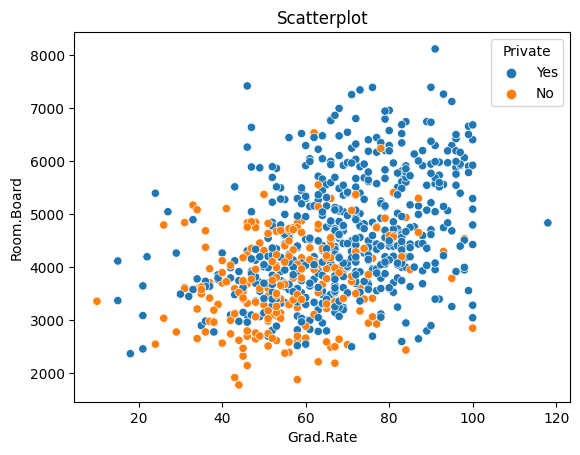

In [ ]:
sns.scatterplot(x="Grad.Rate", y="Room.Board", hue="Private", data=df)

plt.title("Scatterplot")
plt.xlabel("Grad.Rate")
plt.ylabel("Room.Board")

plt.show()

** Crie um scatterplot de F.Undergrad versus Outstate onde os pontos são coloridos pela coluna Private. **

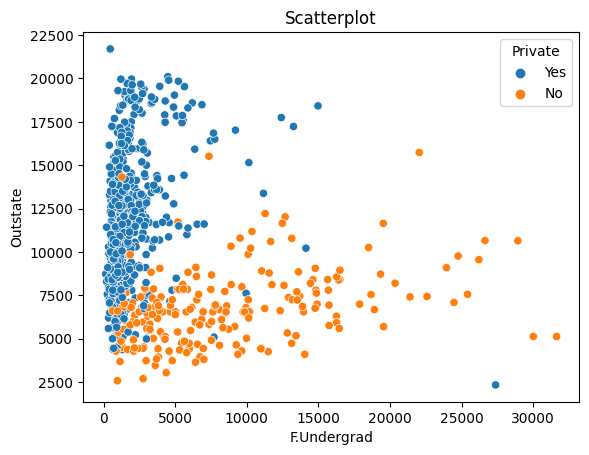

In [ ]:
sns.scatterplot(x="F.Undergrad", y="Outstate", hue="Private", data=df)

plt.title("Scatterplot")
plt.xlabel("F.Undergrad")
plt.ylabel("Outstate")

plt.show()

** Crie um histograma empilhado que mostra o "Out of State Tuition" com base na coluna Private. Tente fazer isso usando [sns.FacetGrid](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.FacetGrid.html). Se isso for muito complicado, veja se você pode fazê-lo apenas usando duas instâncias de pandas.plot(kind='hist'). **

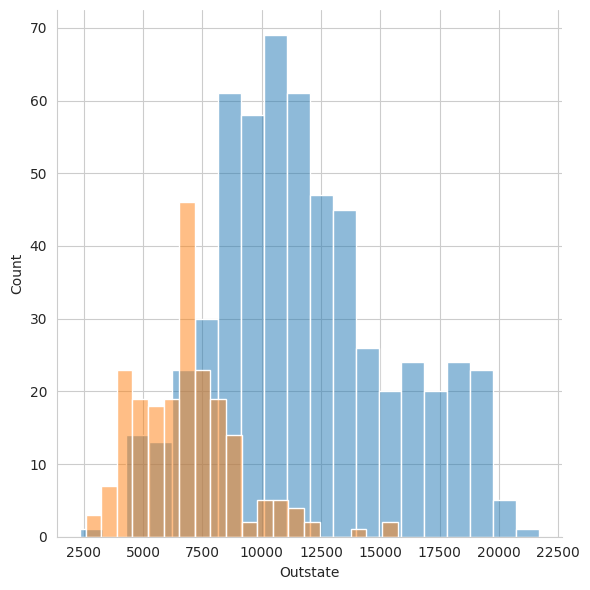

In [ ]:
sns.set_style('whitegrid')

g = sns.FacetGrid(df, hue='Private', height=6)
g.map(sns.histplot, 'Outstate', alpha=0.5, bins=20)

** Crie um histograma semelhante para a coluna Grad.Rate. **

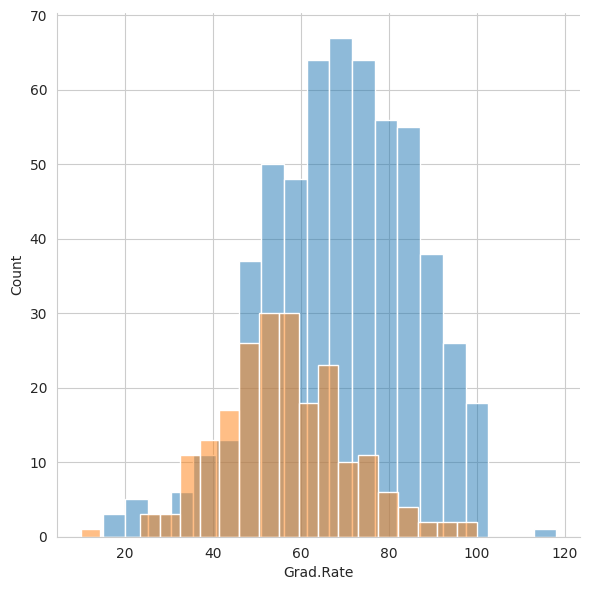

In [ ]:
sns.set_style('whitegrid')

g = sns.FacetGrid(df, hue='Private', height=6)
g.map(sns.histplot, 'Grad.Rate', alpha=0.5, bins=20)

## Criação de clusters "K Means"

Agora é hora de criar os rótulos de Cluster!

** Importe KMeans da SciKit Learn. **

In [ ]:
from sklearn.cluster import KMeans

** Crie uma instância do modelo K Means com 2 clusters. **

In [ ]:
kmeans = KMeans(n_clusters=2)

** Fite o modelo para todos os dados, exceto para o rótulo privado. **

In [ ]:
kmeans.fit(df.drop(['Private', 'Unnamed: 0'], axis=1))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

** Quais são os vetores centrais do cluster?**

In [ ]:
centroids = kmeans.cluster_centers_
print(centroids)

[[1.03631389e+04 6.55089815e+03 2.56972222e+03 4.14907407e+01
  7.02037037e+01 1.30619352e+04 2.46486111e+03 1.07191759e+04
  4.64347222e+03 5.95212963e+02 1.71420370e+03 8.63981481e+01
  9.13333333e+01 1.40277778e+01 2.00740741e+01 1.41705000e+04
  6.75925926e+01]
 [1.81323468e+03 1.28716592e+03 4.91044843e+02 2.53094170e+01
  5.34708520e+01 2.18854858e+03 5.95458894e+02 1.03957085e+04
  4.31136472e+03 5.41982063e+02 1.28033632e+03 7.04424514e+01
  7.78251121e+01 1.40997010e+01 2.31748879e+01 8.93204634e+03
  6.51195815e+01]]


## Avaliação



In [1]:
#aplique o silhuete score
from sklearn.metrics import silhouette_score

labels = kmeans.labels_
silhouette_score = silhouette_score(df.drop(['Private', 'Unnamed: 0'], axis=1), labels)
print(silhouette_score)

NameError: name 'kmeans' is not defined